# 'Static' electrostatic electric field simulator

I created this a few years ago when I was still pretty newish to Python. You create the charges manually and essentially place them where you want. You then just run the rest of the cells and you'll see the resulting electric field from the configuration. I made this in Sagemath

## Setting up the simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
k = 9 #Just pick a value for k which looks similar

In [3]:
def getMagnitude(v):
    '''
    This function determines the magnitude of a vector
    '''
    Sum = 0
    for element in v:
        Sum += element**2
    return n(sqrt(Sum))

In [4]:
def getEfield(r, q):
    '''
    This fuction determines the electric field at the point r due to the charge q.
    r is a position vector and q is a dictionary with all of the values required
    '''
    mu = r - q['position']
    mu_mag = getMagnitude(mu)
    
    E = k*mu/mu_mag**3*q['charge']
    return E

In [5]:
def getNetfield(r, q_list):
    '''
    This function takes into account all of the charges in q_list and determines the net electric field at r
    '''
    E = np.array([0,0]) #this is how you create a vector using np
    for q in q_list:
        E = E + getEfield(r, q)
    return E

## The simulation

### First place the charges on the grid

In [16]:
#List of charges used in simulation
q_1 = {'position': np.array([1, 1]), 'charge': 1*10}
q_2 = {'position': np.array([1.5, 1]), 'charge': -1*10}
q_3 = {'position': np.array([4, 2]), 'charge': -2*10}
q_4 = {'position': np.array([2.5, 3]), 'charge': 1.5*10}

q_list = [q_1, q_2, q_3, q_4]

### Discretise the grid 
#### (I didn't know np.meshgrid existed yet)

In [17]:
#Create a list of points where E-field will be calculated
r_list = []
for i in range(0, 26):
    for j in range(0, 26):
        r_list.append((0.20*i, 0.20*j))

In [18]:
#Calculate net electric field at each point in r_list
E_list = [getNetfield(r, q_list) for r in r_list]
E_mag = [(0.05*E_[0]/getMagnitude(E_), 0.25*E_[1]/getMagnitude(E_)) for E_ in E_list] # E_mag just scales the lines

/opt/sagemath-9.2/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:9: RuntimeWarning: invalid value encountered in true_divide


## Actually create and view the plot

In [19]:
#Initiate plot
P = Graphics()

#Draw all charges being simulated
for q in q_list:
    if (q['charge']<0): 
        c_= "red"
        s_ = "-"+str(round(q['charge'], 2))
    else:
        c_ = "blue"
        s_ = "+"+str(round(q['charge'], 2))
    
    P += point(q['position'], color=c_, size=300, legend_label=str(round(q['charge'], 2)) + 'C')
    P += text(s_, q['position'], fontsize=10, color="white")


#Create lines to plot
for i in range(0, len(E_list)):
    #P += line( [(r_list[i][0], r_list[i][1]), (r_list[i][0]+E_mag[i][0], r_list[i][1]+E_mag[i][1]) ] )
    P += arrow( (r_list[i][0], r_list[i][1]), (r_list[i][0]+E_mag[i][0], r_list[i][1]+E_mag[i][1]), arrowsize=1, width=1, color="black")

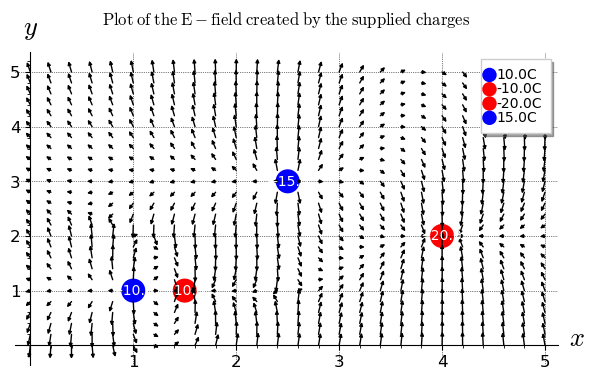

In [20]:
P.show(gridlines=True, show_legend=True, legend_loc=1, 
       title=r"$\mathrm{Plot \; of \; the \; E-field \; created\;by\;the\;supplied\;charges}$"+"\n", fontsize=12,
       axes_labels=['$x$', '$y$'])